In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df = pd.read_csv('../../data/df_analyse.csv')
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer_ID,Country
0,489434,85048,15CM_CHRISTMAS_GLASS_BALL_20_LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United_Kingdom
1,489434,22041,"RECORD_FRAME_7""_SINGLE_SIZE",48,2009-12-01 07:45:00,2.10,13085,United_Kingdom
2,489434,21232,STRAWBERRY_CERAMIC_TRINKET_BOX,24,2009-12-01 07:45:00,1.25,13085,United_Kingdom
3,489434,22064,PINK_DOUGHNUT_TRINKET_POT,24,2009-12-01 07:45:00,1.65,13085,United_Kingdom
4,489434,21871,SAVE_THE_PLANET_MUG,24,2009-12-01 07:45:00,1.25,13085,United_Kingdom
...,...,...,...,...,...,...,...,...
713597,581587,22613,PACK_OF_20_SPACEBOY_NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
713598,581587,22899,CHILDREN'S_APRON_DOLLY_GIRL,6,2011-12-09 12:50:00,2.10,12680,France
713599,581587,23254,CHILDRENS_CUTLERY_DOLLY_GIRL,4,2011-12-09 12:50:00,4.15,12680,France
713600,581587,23255,CHILDRENS_CUTLERY_CIRCUS_PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [72]:
df.describe()

,Invoice,StockCode,Quantity,Price,Customer_ID
count,713602.000000,713602.000000,713602.000000,713602.000000,713602.000000
mean,538442.099013,28207.425398,13.412011,2.931811,15327.925330
std,26488.049502,17715.696735,151.694734,4.393742,1695.645004
min,489434.000000,10002.000000,1.000000,0.000000,12346.000000
25%,516634.000000,21733.000000,2.000000,1.250000,13979.000000
50%,537649.000000,22384.000000,6.000000,1.950000,15264.000000
75%,562551.000000,22940.000000,12.000000,3.750000,16795.000000
max,581587.000000,90208.000000,80995.000000,649.500000,18287.000000


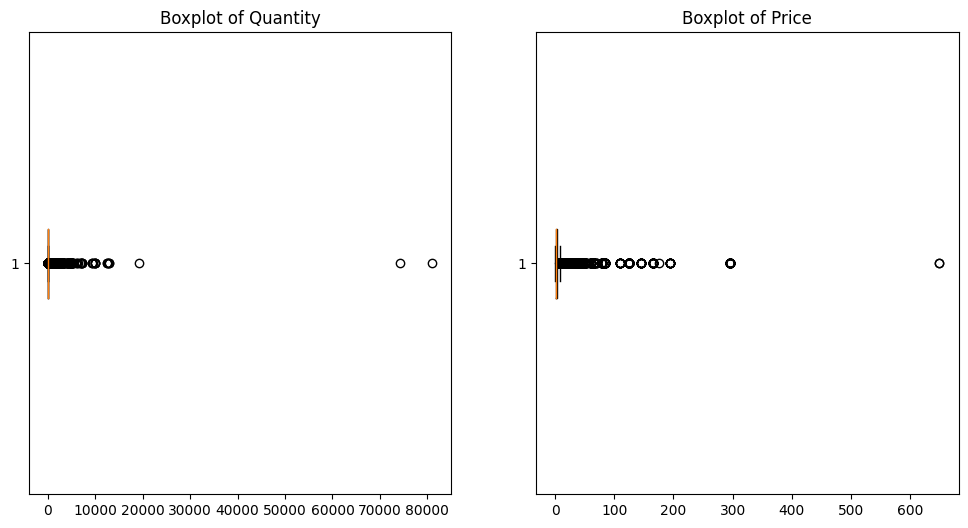

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].boxplot(df['Quantity'], vert=False)
ax[0].set_title('Boxplot of Quantity')

ax[1].boxplot(df['Price'], vert=False)
ax[1].set_title('Boxplot of Price')

plt.show()

In [74]:
# Remove outliers
df = df[df['Quantity'] < 152]
df = df[df['Price'] < 5]

# Checking the shape of the data after outlier removal
df.shape

(611793, 8)

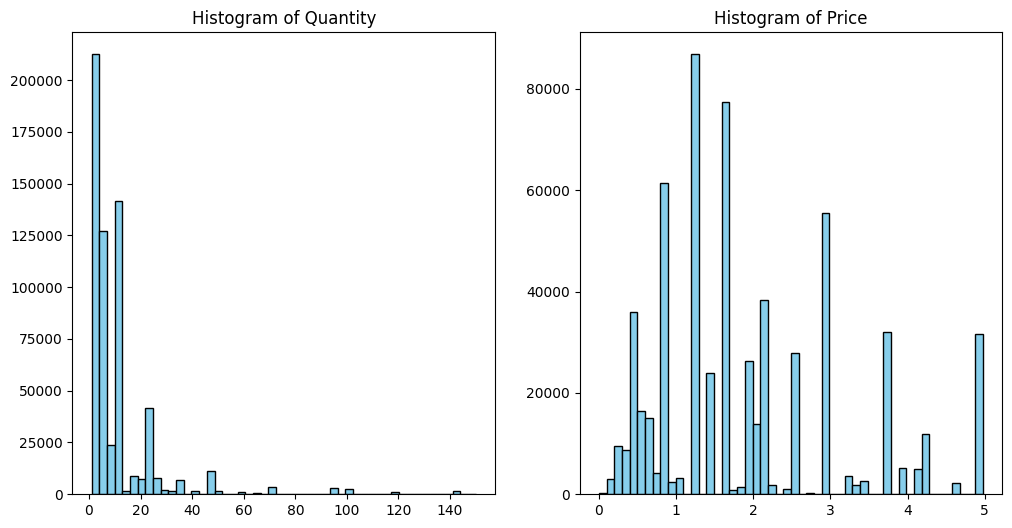

In [75]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].hist(df['Quantity'], bins=50, color='skyblue', edgecolor='black')
ax[0].set_title('Histogram of Quantity')

ax[1].hist(df['Price'], bins=50, color='skyblue', edgecolor='black')
ax[1].set_title('Histogram of Price')

plt.show()

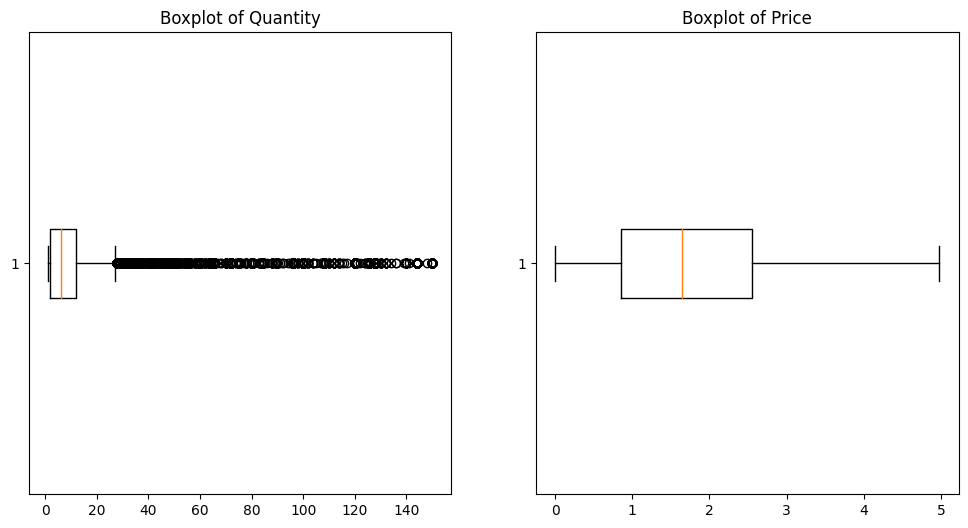

In [76]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].boxplot(df['Quantity'], vert=False)
ax[0].set_title('Boxplot of Quantity')

ax[1].boxplot(df['Price'], vert=False)
ax[1].set_title('Boxplot of Price')

plt.show()

/tmp/ipykernel_13399/1120932690.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_trend = df.groupby(df['InvoiceDate'].dt.to_period('M')).sum()['TotalSales']


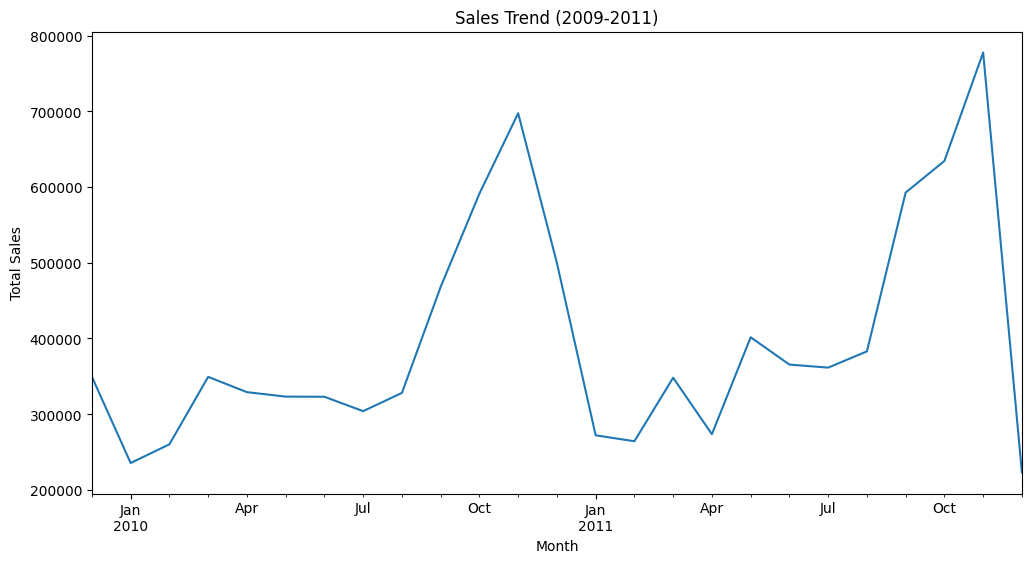

In [77]:
# Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create a new column for total sales
df['TotalSales'] = df['Quantity'] * df['Price']

# Group by month and calculate total sales
sales_trend = df.groupby(df['InvoiceDate'].dt.to_period('M')).sum()['TotalSales']

# Plot the sales trend
sales_trend.plot(kind='line', figsize=(12, 6))
plt.title('Sales Trend (2009-2011)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

/tmp/ipykernel_13399/2646797269.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_country = df.groupby('Country').sum()['TotalSales']


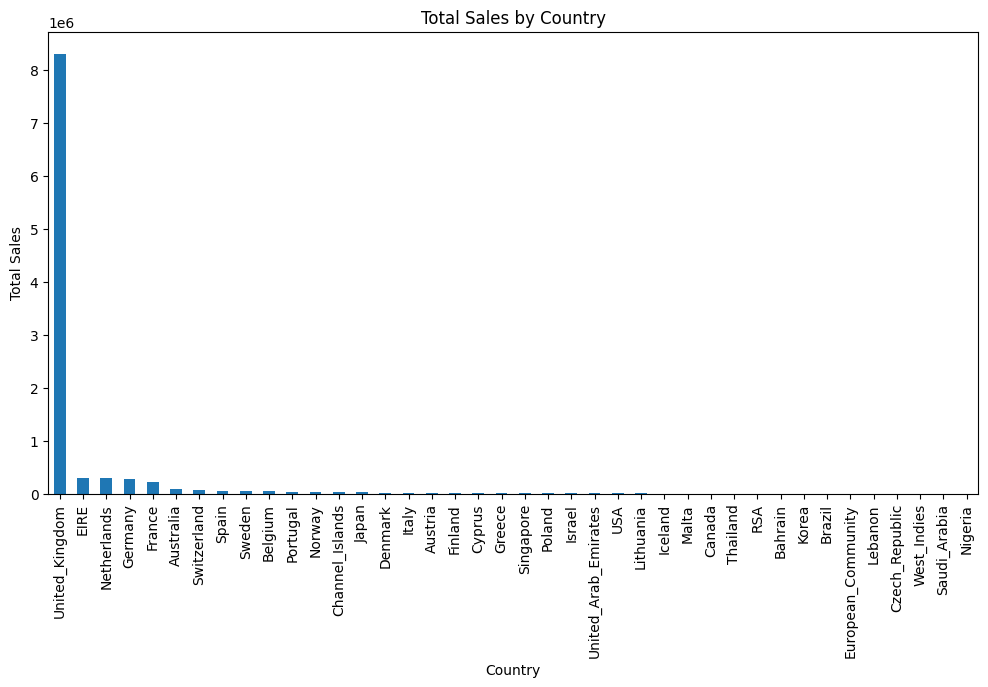

In [78]:
# total de vente par total sale par pays graphique a barre

# Group by country and calculate total sales
sales_country = df.groupby('Country').sum()['TotalSales']

# Plot the total sales by country
sales_country.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()

/tmp/ipykernel_13399/1162907596.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_by_country = df.groupby('Country').sum()['TotalSales']
/tmp/ipykernel_13399/1162907596.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


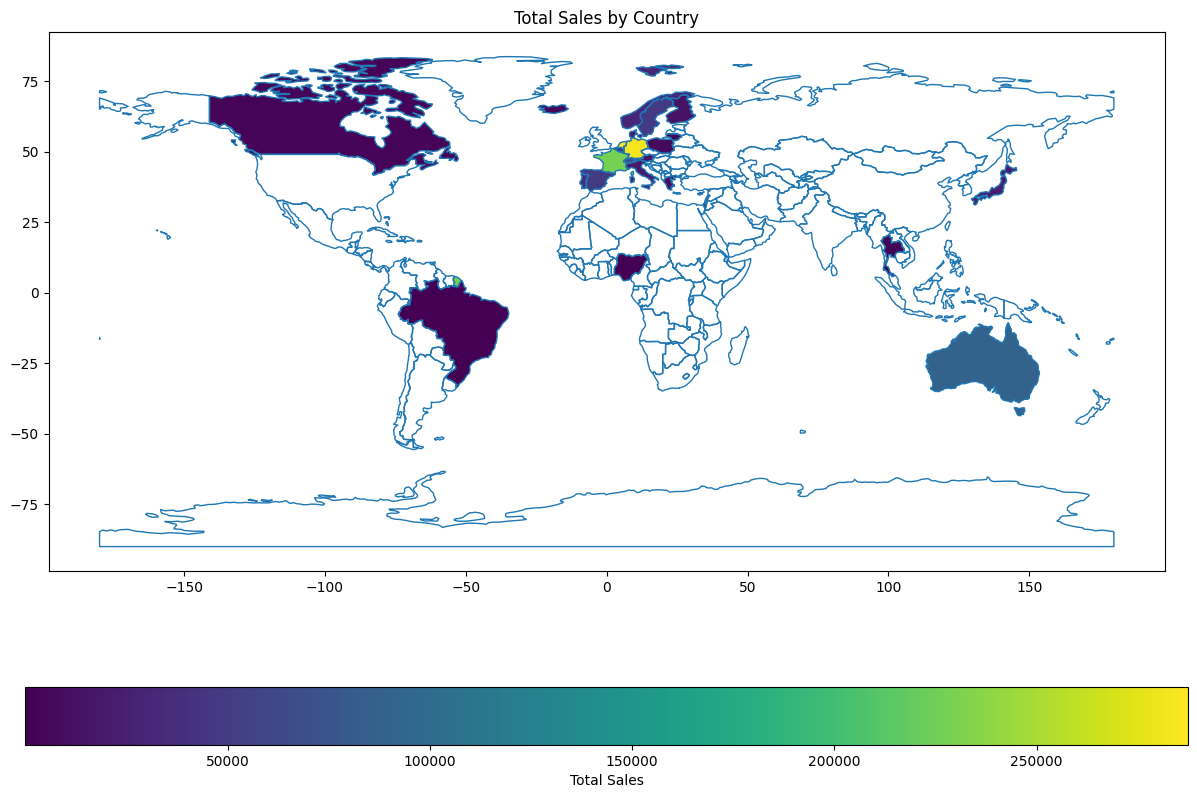

In [79]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Group the data by country and calculate total sales
sales_by_country = df.groupby('Country').sum()['TotalSales']

# Load a GeoDataFrame with the geometry of all countries in the world
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the data with the GeoDataFrame
world = world.merge(sales_by_country, how='left', left_on='name', right_index=True)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)
world.plot(column='TotalSales', ax=ax, legend=True, cmap='viridis',
           legend_kwds={'label': 'Total Sales', 'orientation': 'horizontal'})
plt.title('Total Sales by Country')
plt.show()


In [80]:
# enregister le df dans un fichier csv
df.to_csv('../../data/df_rfm.csv', index=False)